# Import packages

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

## Form the problem

In [19]:
n = 2
x = cp.Variable(n)
A = np.array([[2,1],[1,3]])
b = np.array([1,1])
prob = cp.Problem(cp.Minimize(sum(x)), 
               [A@x >= b, 
                x >= 0])

In [20]:
result = prob.solve()
print(x.value)
print(result)

[0.4 0.2]
0.5999999999116253


In [12]:
np.amax(np.array([1,3]))

3

In [13]:
n = 2
t = cp.Variable(1)
x = cp.Variable(n)
A = np.array([[2,1],[1,3]])
b = np.array([1,1])
prob = cp.Problem(cp.Minimize(t), 
               [A@x >= b, 
                x >= 0,
                x <= t])

In [14]:
result = prob.solve()
print(x.value)

[0.33333333 0.33333333]


In [16]:
n = 2
x = cp.Variable(n)
w = [1,9]
A = np.array([[2,1],[1,3]])
b = np.array([1,1])
prob = cp.Problem(cp.Minimize((x**2).T @ w), 
               [A@x >= b, 
                x >= 0])

In [17]:
result = prob.solve()
print(x.value)

[0.5        0.16666667]


In [18]:
result

0.5000000000000003

# Exercise 3

In [22]:
n = 100
m = 300
x = cp.Variable(n)
A = np.random.uniform(size=(m,n))
b = A@np.ones(n)/2
c = - np.random.uniform(size=n)
prob = cp.Problem(cp.Minimize(c.T@x), 
               [A@x <= b, 
                x >= 0,
                x <= 1])

result = prob.solve()
print(x.value)
print(result)

[4.63292352e-11 1.00000000e+00 1.00000000e+00 3.75330094e-11
 9.80592926e-01 1.00000000e+00 4.57004319e-11 1.00000000e+00
 7.01244832e-11 6.32354019e-11 1.00000000e+00 2.79293797e-11
 1.00000000e+00 2.54815774e-08 5.84157545e-11 2.34701206e-10
 2.71047465e-11 1.62539396e-11 1.00000000e+00 3.06263889e-11
 6.66875712e-01 3.71766846e-11 1.93359923e-09 1.00000000e+00
 1.07309033e-01 1.92605797e-11 4.01464588e-11 1.00000000e+00
 1.93853400e-01 6.71875771e-01 2.27441935e-11 8.86573717e-12
 5.17776774e-11 1.16200956e-01 9.66489190e-11 1.43943593e-11
 1.00000000e+00 8.19309653e-11 2.56214627e-10 1.70109845e-11
 1.91238658e-11 1.00000000e+00 8.70993515e-10 1.00000000e+00
 2.09673105e-11 2.70686320e-01 2.44084815e-01 1.00000000e+00
 7.25115187e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.47853463e-11 4.99305835e-11 1.68832164e-11 1.00000000e+00
 2.18845000e-11 3.19960512e-11 1.00000000e+00 9.12623054e-01
 1.00000000e+00 4.86433352e-11 1.00000000e+00 1.00000000e+00
 5.10110442e-02 1.000000

(array([49.,  3.,  2.,  0.,  0.,  0.,  2.,  1.,  1., 42.]),
 array([8.86573717e-12, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

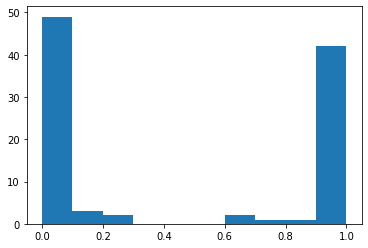

In [24]:
plt.hist(x.value)

In [27]:
sim_num = 50
results = []
Ls = []

for i in range(0,sim_num):

  x = cp.Variable(n)
  A = np.random.uniform(size=(m,n))
  b = A@np.ones(n)/2
  c = - np.random.uniform(size=n)
  prob = cp.Problem(cp.Minimize(c.T@x), 
                [A@x <= b, 
                  x >= 0,
                  x <= 1])

  result = prob.solve()
  results.append(result)
  Ls.append(c.T@x.value)

-36.98241027353357


(array([2., 4., 7., 8., 9., 4., 5., 3., 7., 1.]),
 array([-36.98241027, -36.46170767, -35.94100507, -35.42030247,
        -34.89959987, -34.37889727, -33.85819467, -33.33749207,
        -32.81678947, -32.29608687, -31.77538427]),
 <a list of 10 Patch objects>)

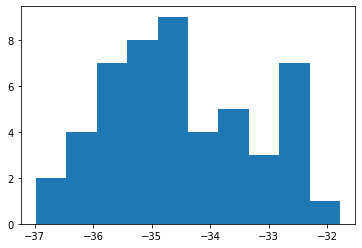

In [28]:
print(min(Ls))

plt.hist(Ls)

-36.37045481192944


(array([ 4.,  6.,  7.,  5., 10.,  3.,  6.,  3.,  4.,  2.]),
 array([-36.37045481, -35.83186102, -35.29326722, -34.75467343,
        -34.21607963, -33.67748584, -33.13889204, -32.60029825,
        -32.06170445, -31.52311066, -30.98451686]),
 <a list of 10 Patch objects>)

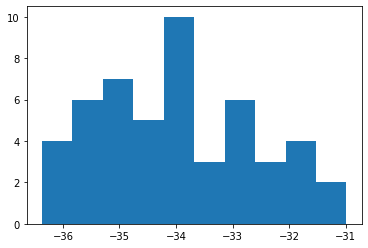

In [26]:
print(min(results))

plt.hist(results)

In [36]:
sim_num = 50
Ts = np.arange(0,1,1/100)
obj = []
maxviol = []

for t in Ts:
  #print(t)

  x = cp.Variable(n)
  A = np.random.uniform(size=(m,n))
  b = A@np.ones(n)/2
  c = - np.random.uniform(size=n)
  prob = cp.Problem(cp.Minimize(c.T@x), 
                [A@x <= b, 
                  x >= 0,
                  x <= 1])
  
  result = prob.solve()

  x_hat = np.zeros(n)
  mask = x.value >= np.ones(n)*t
  x_hat[mask] = 1

  max_viol = np.amax(A@x_hat - b)
  maxviol.append(max_viol)
  obj.append(c.T@x_hat)

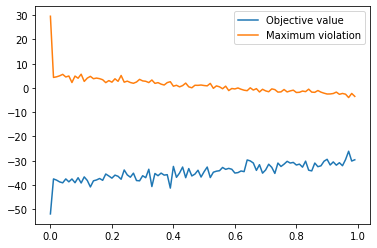

In [37]:
plt.plot(Ts,obj,label='Objective value')
plt.plot(Ts,maxviol,label='Maximum violation')
plt.legend(loc='upper right')
plt.show()

In [41]:
obj = np.asarray(obj)
maxviol = np.asarray(maxviol)
U = min(obj[(maxviol<=0)])
print(U)

-35.24627594456593


# Exercise 4 - Simple portfolio optimization

In [43]:
n = 20

# pbar = ones(n,1)*.03+[rand(n-1,1); 0]*.12;
# rng(5,'v5normal');
# S = randn(n,n);
# S = S'*S;
# S = S/max(abs(diag(S)))*.2;
# S(:,n) = zeros(n,1);
# S(n,:) = zeros(n,1)';
# x_unif = ones(n,1)/n;

temp = np.random.uniform(size=n)
temp[-1] = 0
pbar = np.ones(n)*.03 + temp*0.12
S = np.random.normal(size = (n,n))
S = S.T@S
S = S / np.amax(abs(np.diag(S)))*0.2
x_unif = np.ones(n) / n

In [45]:
unif_risk = x_unif.T@S@x_unif
print(np.sqrt(unif_risk))

0.0653910817688347


In [50]:
x = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = pbar.T*x
risk = cp.quad_form(x, S)

prob = cp.Problem(cp.Minimize(risk), 
               [ret == x_unif.T@pbar, 
                cp.sum(x) == 1])

result = prob.solve()


print(cp.sqrt(risk).value)

0.01939120051666211


In [51]:
x = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = pbar.T*x
risk = cp.quad_form(x, S)

prob = cp.Problem(cp.Minimize(risk), 
               [ret == x_unif.T@pbar, 
                x >= 0,
                cp.sum(x) == 1])

result = prob.solve()


print(cp.sqrt(risk).value)

0.03177660226059637


In [55]:
# Limit on short positions
x = cp.Variable(n)
ret = pbar.T*x
risk = cp.quad_form(x, S)

prob = cp.Problem(cp.Minimize(risk), 
               [ret == x_unif.T@pbar, 
                cp.sum(cp.neg(x))<=0.5,
                cp.sum(x) == 1])

result = prob.solve()


print(cp.sqrt(risk).value)

0.019668495081813526


In [ ]:
https://www.cvxpy.org/tutorial/functions/index.html